In [22]:
# theano imports
import theano
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from theano.tensor.nnet.conv import conv2d
# from theano.tensor.signal.downsample import max_pool_2d
from theano.tensor.signal.pool import pool_2d as max_pool_2d

# other imports
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
# read our data in 
with open('conv_data/5_tensor.p', 'rb') as f:
    loaded_data = pickle.load(f)

labels = pd.read_csv('one_hot_labels.csv')

In [5]:
loaded_data[:2]    

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [6]:
one_hot = labels.values

In [7]:
one_hot[:2]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(loaded_data, one_hot)

In [9]:
print xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

(101110, 5, 21) (33704, 5, 21) (101110, 6) (33704, 6)


In [10]:
xTrain = xTrain.reshape(-1, 1, 5, 21)
xTest = xTest.reshape(-1, 1, 5, 21)

In [11]:
print xTrain.shape
print xTest.shape
print yTrain.shape
print yTest.shape

(101110, 1, 5, 21)
(33704, 1, 5, 21)
(101110, 6)
(33704, 6)


In [13]:
# example

__author__ = 'mike.bowles'
import theano
from theano import tensor as T
import numpy as np
from theano.tensor.signal.downsample import max_pool_2d
from theano.tensor.nnet.conv import conv2d

X = theano.shared(np.array(range(10*1*5*21), dtype=theano.config.floatX).reshape((10, 1, 5, 21)))

w = theano.shared(np.array(range(256*5*21), dtype=theano.config.floatX)).reshape((256, 1, 5, 21))

convOut = conv2d(X, w, border_mode='valid')  #border_mode={'valid', 'full'}

convOut = convOut.reshape((-1, 256))

convOutTest = convOut.eval()
print convOutTest
print convOutTest.shape

[[  1.87460000e+05   7.60760000e+05   1.33406000e+06 ...,   1.45232352e+08
    1.45805664e+08   1.46378960e+08]
 [  7.60760000e+05   2.49168500e+06   4.22261000e+06 ...,   4.38684928e+08
    4.40415648e+08   4.42146304e+08]
 [  1.33406000e+06   4.22261000e+06   7.11116000e+06 ...,   7.32137024e+08
    7.35025472e+08   7.37914176e+08]
 ..., 
 [  4.20056000e+06   1.28772350e+07   2.15539100e+07 ...,   2.19939917e+09
    2.20807578e+09   2.21675213e+09]
 [  4.77386000e+06   1.46081600e+07   2.44424440e+07 ...,   2.49285171e+09
    2.50268570e+09   2.51251994e+09]
 [  5.34716000e+06   1.63390850e+07   2.73310100e+07 ...,   2.78630400e+09
    2.79729562e+09   2.80828749e+09]]
(10, 256)


In [17]:
srng = RandomStreams()

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def glorot_init_weights(shape):
    (h, w) = shape
    normalizer = 2.0 * sqrt(6) / sqrt(h + w) * 0.1  #factors: correct for uni[0,1], glo, glo, softmax deriv
    return theano.shared(floatX((np.random.random_sample(shape) - 0.5) * normalizer))

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def activate(X):
    return T.nnet.relu(X)

def rectify(X):
    return T.maximum(X, 0.)
    #return T.maximum(X, 0.01*X)  #leaky rectifier

def softmax(X):
    e_x = T.exp(X - X.max(axis=1).dimshuffle(0, 1, 'x', 'x'))
    return e_x / e_x.sum(axis=1).dimshuffle(0, 1, 'x', 'x')

def dropout(X, p=0.0):
    if p > 0:
        retain_prob = 1 - p
        X *= srng.binomial(X.shape, p=retain_prob, dtype=theano.config.floatX)
        X /= retain_prob
    return X

def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    
    for p, g in zip(params, grads):
        acc = theano.shared(p.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    
    return updates

def model(X, wi, wh, wo, p_drop_conv, p_drop_hidden):
    layer_1 = rectify(conv2d(X, wi, border_mode='valid')) # , border_mode='full'
    layer_1 = layer_1.reshape((-1, 256))
    #     layer_1 = dropout(layer_1, p_drop_conv)

    layer_2 = rectify(T.dot(layer_1, wh))
#     layer_2 = dropout(layer_2, p_drop_hidden)

#     pyx = softmax(T.dot(layer_2, wo))
    pyx = T.nnet.softmax(T.dot(layer_2, wo))
    return layer_1, layer_2, pyx

In [18]:
# def model(X, w, w2, w3, w4, p_drop_conv, p_drop_hidden):
#     l1a = rectify(conv2d(X, w)) # , border_mode='full'
# #     l1 = max_pool_2d(l1a, (2, 2))
#     l1 = dropout(l1a, p_drop_conv)

#     l2a = rectify(conv2d(l1, w2))
# #     l2 = max_pool_2d(l2a, (2, 2))
#     l2 = dropout(l2a, p_drop_conv)

#     l3a = rectify(conv2d(l2, w3))
# #     l3b = max_pool_2d(l3a, (2, 2))
#     l3 = T.flatten(l3a, outdim=2)
#     l3 = dropout(l3, p_drop_conv)

#     l4 = rectify(T.dot(l3, w4))
#     l4 = dropout(l4, p_drop_hidden)

#     pyx = softmax(T.dot(l4, w_o))
#     return l1, l2, l3, l4, pyx

# w = init_weights((32, 1, 3, 3))
# w2 = init_weights((64, 32, 3, 3))
# w3 = init_weights((128, 64, 3, 3))
# w4 = init_weights((128 * 3 * 3, 625))
# w_o = init_weights((625, 10))

In [28]:
X = T.ftensor4()
Y = T.fmatrix()

# define mini-batch size
mbs = 128

# define number of desired features out of convolution
n_conv = 256

# define hidden layer depth
h_depth = 600

wi = init_weights((n_conv, 1, 5, 21))
wh = init_weights((n_conv, h_depth))
wo = init_weights((h_depth, 6))

noise_l1, noise_l2, noise_py_x = model(X, wi, wh, wo, 0.2, 0.5)
l1, l2, py_x = model(X, wi, wh, wo, 0., 0.)
y_x = T.argmax(py_x, axis=1)


cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [wi, wh, wo]
updates = RMSprop(cost, params, lr=1e-7)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

# number of training iterations to perform
n_train = 101

costs = []
# performing our training
for i in xrange(n_train):
    for start, end in zip(xrange(0, len(xTrain), mbs), 
                          xrange(mbs, len(xTrain), mbs)):
        cost = train(xTrain[start:end], yTrain[start:end])
#         a, b, c = model(floatX(xTrain[start:end]), wi, wh, wo, 0., 0.)
#         print a.eval().shape, b.eval().shape, c.eval().shape,
#         print i, np.mean(np.argmax(yTest, axis=1) == predict(xTest))
    costs.append(cost)
    print i, np.mean(np.argmax(yTest, axis=1) == predict(xTest))

0 0.293585331118


KeyboardInterrupt: 

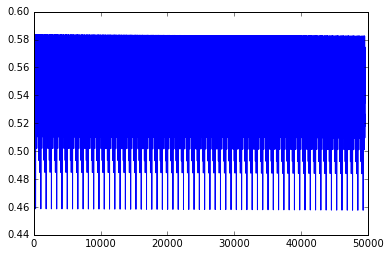

In [26]:
plt.plot(costs);

http://deeplearning.net/software/theano/library/tensor/nnet/nnet.html#tensor.nnet.softmax
http://deeplearning.net/software/theano/library/tensor/nnet/conv.html#theano.tensor.nnet.conv.conv2d

In [ ]:
class ProteinModel():
    def __init__(self, ):
        
    def _floatX(X):
        return np.asarray(X, dtype=theano.config.floatX)
    
    def _glorot_init_weights(shape):
        (h, w) = shape
        #factors: correct for uni[0,1], glo, glo, softmax deriv
        normalizer = 2.0 * sqrt(6) / sqrt(h + w) * 0.1  
        return theano.shared(floatX((np.random.random_sample(shape) - 0.5) * normalizer))
    
    def _activate(X):
        return T.nnet.relu(X)
    
    def _dropout(X, p=0.0):
        if p > 0:
            retain_prob = 1 - p
            X *= srng.binomial(X.shape, p=retain_prob, dtype=theano.config.floatX)
            X /= retain_prob
        return X
    
    def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
        grads = T.grad(cost=cost, wrt=params)
        updates = []

        for p, g in zip(params, grads):
            acc = theano.shared(p.get_value() * 0.)
            acc_new = rho * acc + (1 - rho) * g ** 2
            gradient_scaling = T.sqrt(acc_new + epsilon)
            g = g / gradient_scaling
            updates.append((acc, acc_new))
            updates.append((p, p - lr * g))

        return updates
    
    def model(X, wi, wh, wo, p_drop_conv, p_drop_hidden):
        layer_1 = rectify(conv2d(X, wi, border_mode='valid')) # , border_mode='full'
        layer_1 = layer_1.reshape((-1, 256))
        #     layer_1 = dropout(layer_1, p_drop_conv)

        layer_2 = rectify(T.dot(layer_1, wh))
    #     layer_2 = dropout(layer_2, p_drop_hidden)

    #     pyx = softmax(T.dot(layer_2, wo))
        pyx = T.nnet.softmax(T.dot(layer_2, wo))
        return layer_1, layer_2, pyx
    
    